In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Project/California Housing Price/dataset/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Drop null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#Split the data into Train And Test Sets
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

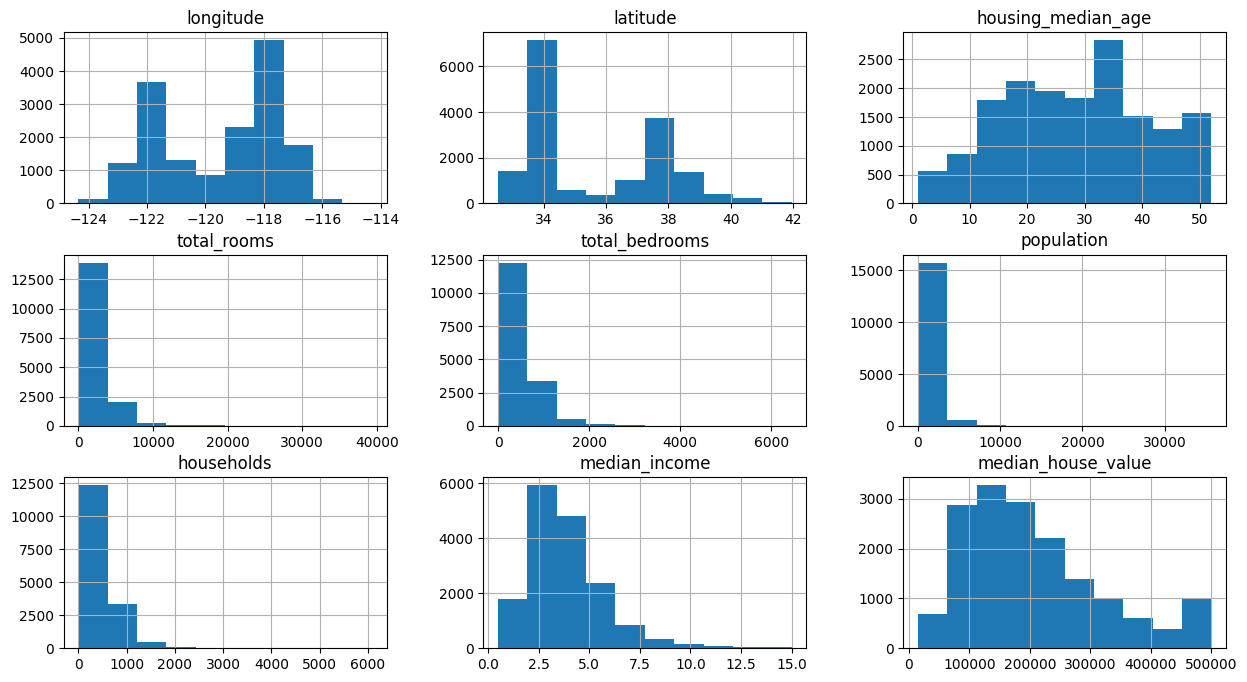

In [10]:
train_data.hist(figsize=(15,8))

In [11]:
#Data preprocessing

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

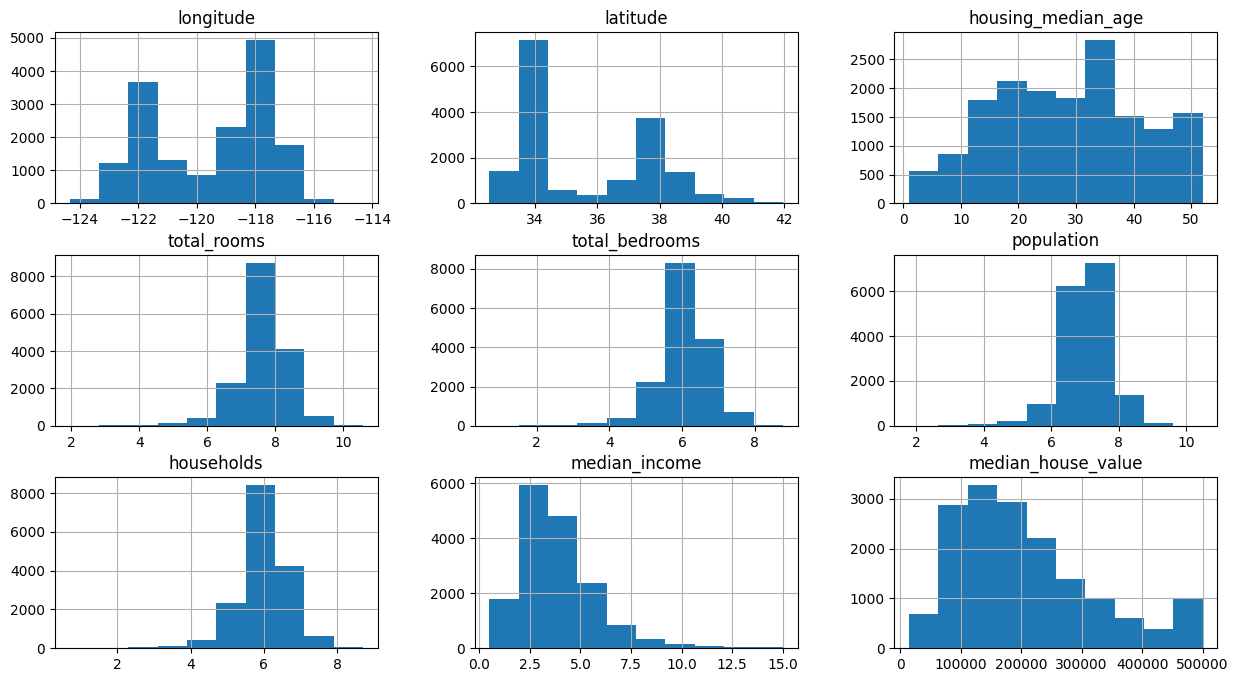

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7239
INLAND        5185
NEAR OCEAN    2112
NEAR BAY      1806
ISLAND           4
Name: ocean_proximity, dtype: int64

In [14]:
#convert categories to 0 or 1
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [15]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924770,-0.104764,0.032287,0.064243,0.112361,0.060451,-0.018416,-0.045648,0.323216,-0.062155,0.009482,-0.474737,0.050849
latitude,-0.924770,1.000000,0.004889,-0.033436,-0.069740,-0.137359,-0.090819,-0.078449,-0.144635,-0.448918,0.357639,-0.016625,0.357774,-0.165019
housing_median_age,-0.104764,0.004889,1.000000,-0.313844,-0.272475,-0.242818,-0.242034,-0.117461,0.110480,0.049465,-0.238362,0.014038,0.253803,0.019601
total_rooms,0.032287,-0.033436,-0.313844,1.000000,0.946134,0.862913,0.931854,0.203381,0.156718,0.015835,-0.009126,-0.005633,-0.013488,0.002082
total_bedrooms,0.064243,-0.069740,-0.272475,0.946134,1.000000,0.896478,0.974458,-0.028321,0.051092,0.037857,-0.041248,0.000249,-0.014367,0.014585
population,0.112361,-0.137359,-0.242818,0.862913,0.896478,1.000000,0.930931,-0.009197,-0.024943,0.110102,-0.067389,-0.009730,-0.058314,-0.014593
households,0.060451,-0.090819,-0.242034,0.931854,0.974458,0.930931,1.000000,0.001032,0.070824,0.068624,-0.083999,-0.006621,-0.003764,0.018748
median_income,-0.018416,-0.078449,-0.117461,0.203381,-0.028321,-0.009197,0.001032,1.000000,0.689006,0.164635,-0.237632,-0.009275,0.058846,0.031333
median_house_value,-0.045648,-0.144635,0.110480,0.156718,0.051092,-0.024943,0.070824,0.689006,1.000000,0.253262,-0.483647,0.021025,0.162297,0.143321
<1H OCEAN,0.323216,-0.448918,0.049465,0.015835,0.037857,0.110102,0.068624,0.164635,0.253262,1.000000,-0.607679,-0.013949,-0.314216,-0.343428


<Axes: >

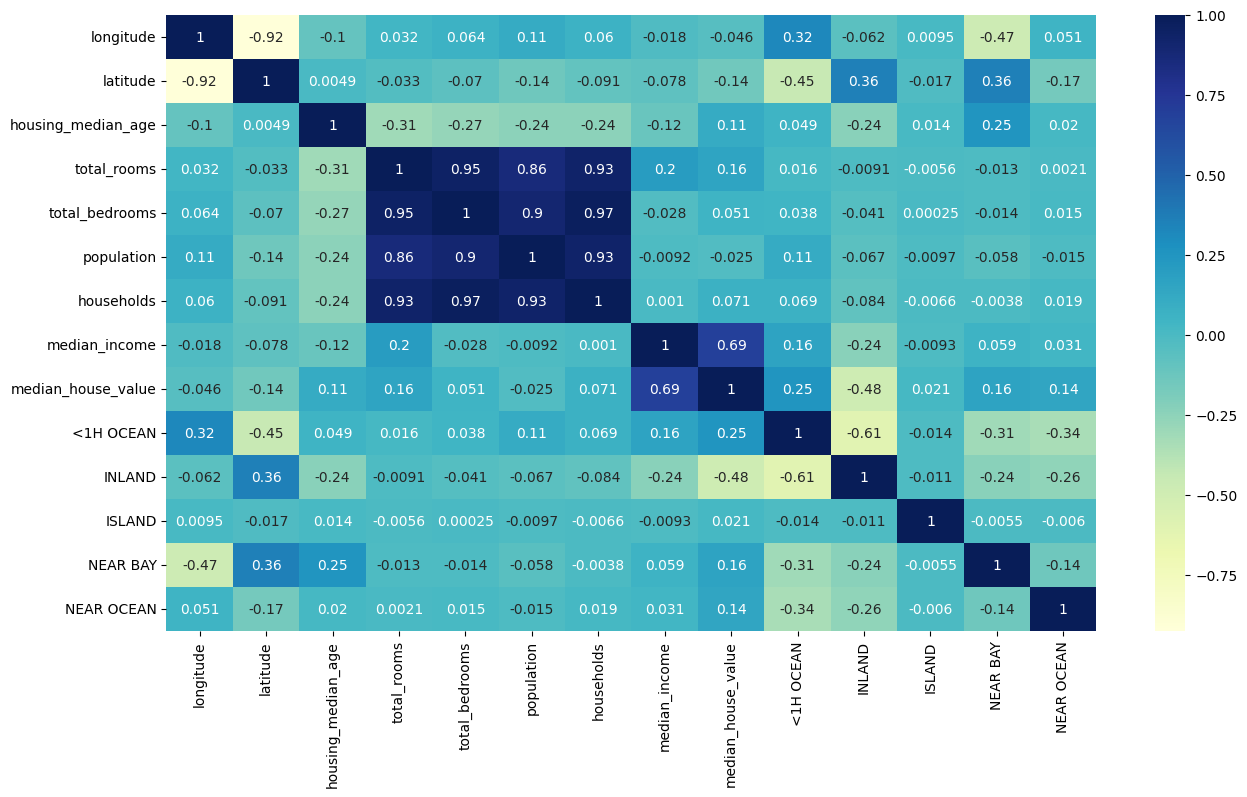

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

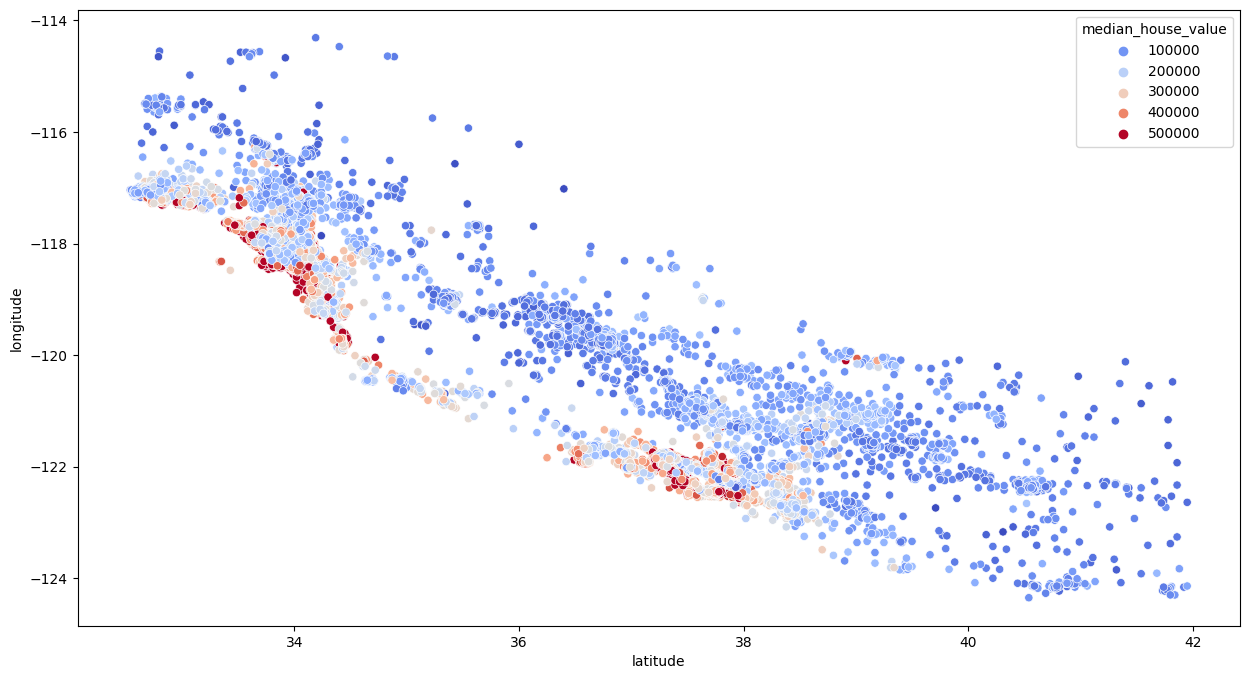

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value",palette="coolwarm")

In [18]:
#Feature engineering
train_data['bedroom_ratio']=train_data["total_bedrooms"]/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

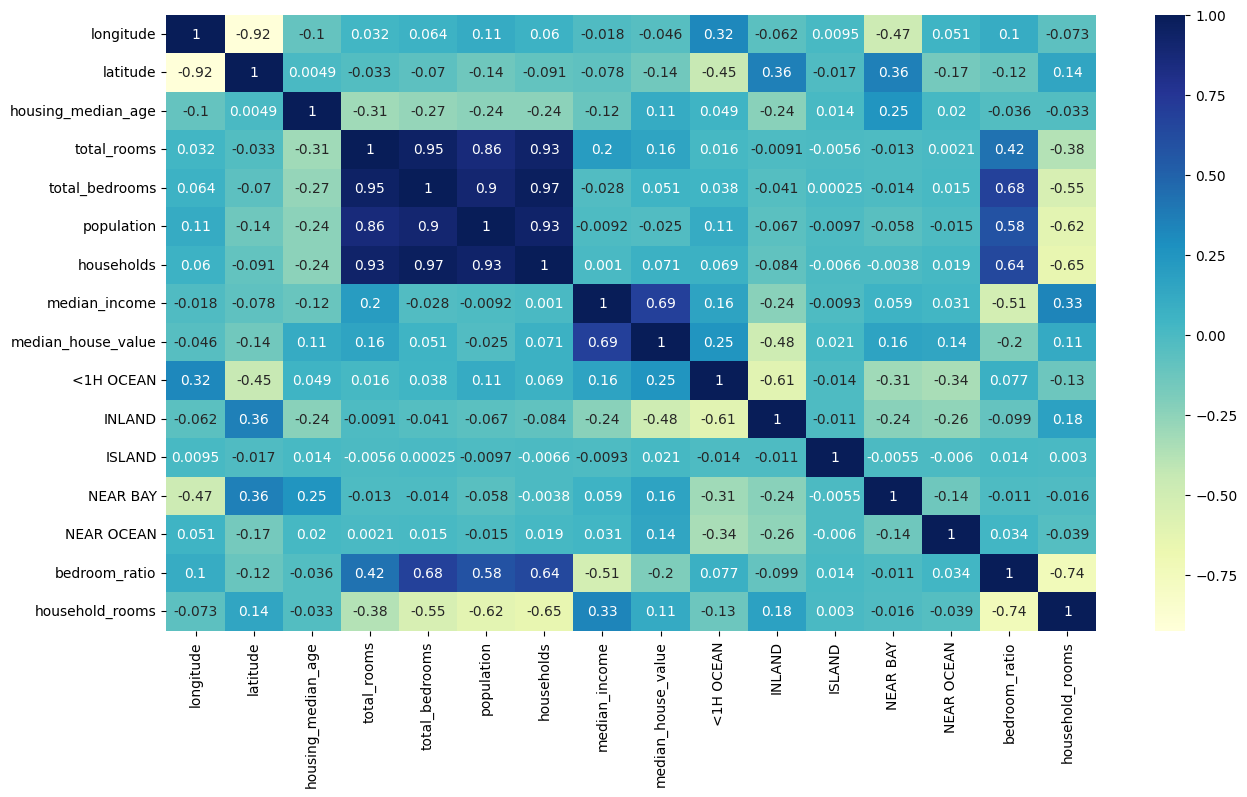

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [20]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg= LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [21]:
test_data = X_test.join(y_test)

#Data preprocessing

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

#convert categories to 0 or 1
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

#Feature engineering
test_data['bedroom_ratio']=test_data["total_bedrooms"]/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [22]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [23]:
X_test_s = scaler.transform(X_test)

In [24]:
reg.score(X_test_s, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-358.61211728515366

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 4630533523164.447
R-squared: -358.61211728515366


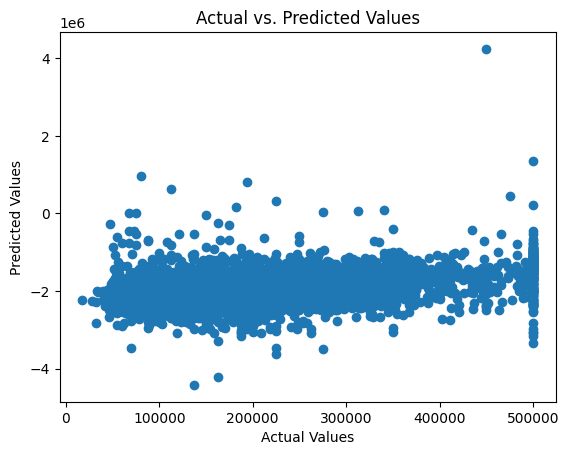

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the testing set
y_pred = reg.predict(X_test_s)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()